## **TIL**
* **빈도수 분석에서의 데이터 구조**
    * 리스트와 array의 차이: 리스트 - 데이터의 삽입/삭제가 비교적 쉽다.
    * 빈도수 분석에서 `null`, `na` 데이터의 비율이 가장 많은 경우가 있음
    * 데이터를 제거한다: 그 자리를 `null`값으로 대체한다.

* 데이터 구조화 예시 
    * `(자료1.split("\n"))`<br> 
        * ["환경을 위해서 오전  출근 시간에 탄소배출권을 실시하겠습니다."] <br>
        * ["육아 휴직을 장려하겠습니다."] \n

    * `자료2 = noun_extractor.extract(자료1)`
        * [[환경, 오전, 출근, 시간, 탄소, 배출],[육아, 휴직, 장려]]

    * **연관성 분석을 위해서는 자료1을 거쳐 자료2의 형태로 변환해주어야 함!** 

    * 자료2에서 전처리(불용어 치환 등)
        * 워드 클라우드로 만들기 위해서는 `1행 n열의 리스트`로 작업
        * `[환경, 오전, 출근, co2, 배출, 육아, 장려]` --> 단어, 빈도 수
            * `환경: 1, 오전: 1 ...`

### **Okt(): 한국어 형태소 분석기**
* OKT는 한국어 자연어 처리를 위한 Python 라이브러리로, 형태소 분석, 품사 태깅, 의존 구문 분석 등 다양한 기능을 제공

* **OKT에서 제공하는 품사 태그**

명사

    * NN: 일반 명사
    * NP: 고유 명사
    * NR: 수사 명사
    * NX: 조사가 붙은 명사
형용사

    * VA: 형용사
    * VN: 명사형 형용사
동사

    * VV: 동사
    * VX: 조사가 붙은 동사
부사

    * MAG: 일반 부사
    * MAJ: 조사가 붙은 부사
조사

    * JC: 조사
관형사

    * JK: 관형사
접속사

    * JC: 접속사
기호

    * SF: 문장 부호
    * SS: 특수 기호
    * SP: 띄어쓰기

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
from wordcloud import WordCloud

In [5]:
df=pd.read_table('./12장/ratings_train.txt')
df

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [6]:
negatives = df[df['label'] == 0]
positives = df[df['label'] == 1]

**데이터 편향(긍,부정 label의 갯수 차이)확인**

<BarContainer object of 2 artists>

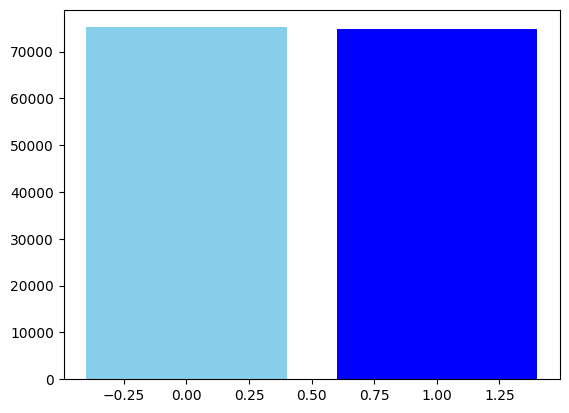

In [7]:
tmp = df['label'].value_counts()
plt.bar(tmp.index, tmp, color=["skyblue", "blue"])

In [8]:
df['label'].nunique() #중복 제거한 고유 값의 개수

2

**비어있는 document 리스트 확인**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [10]:
df['document'].isna().sum()

5

In [11]:
print(df['id'].nunique())
print("-"*100)
print(df.isnull().sum())

150000
----------------------------------------------------------------------------------------------------
id          0
document    5
label       0
dtype: int64


* document 열에 중복된 id값이 있음을 확인
* 하나의 아이디로 여러개의 값을 작성하는 것은 어쩔 수 없는 부분이기 때문에 중복 제거 x

* 예를 들어 document가 반드시 필요하면 id 값을 찾아서 연락하면 됨

* 기술적인 부분: document 열에 null 값이 있으면 안돼서 pandas 내의 함수를 사용해서 null 데이터와 중복 데이터를 조회했다. 

In [12]:
print(df.nunique())

id          150000
document    146182
label            2
dtype: int64


In [13]:
df['document'] = df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "")

In [14]:
df.head()

,id,document,label
0,9976970,아더빙진짜짜증나네요목소리,0
1,3819312,흠포스터보고초딩영화줄오버연기조차가볍지않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소이야기구먼솔직히재미는없다평점조정,0
4,6483659,사이몬페그의익살스런연기가돋보였던영화스파이더맨에서늙어보이기만했던커스틴던스트가너무나도이...,1


In [15]:
from konlpy.tag import Okt
okt = Okt()
sentence = df['document'][:1000]

s_list = [okt.pos(sen) for sen in sentence]
temp_list = [word for word, tag in s_list if tag in ['Noun', 'Adjective']]

KeyboardInterrupt: 

In [16]:
temp_list = []
dataList = []

for sentence in df['document'][:1000]:
 s_list=okt.pos(sentence)
 dataList.append(s_list)
 for word,tag in s_list:
   if tag in ['Noun','Adjective']:
     temp_list.append(word)
counts=collections.Counter(temp_list)
tag=counts.most_common(50)
tag

[('영화', 300),
 ('진짜', 66),
 ('정말', 62),
 ('연기', 48),
 ('최고', 48),
 ('사람', 43),
 ('보고', 37),
 ('감동', 32),
 ('생각', 31),
 ('점', 30),
 ('이영화', 30),
 ('배우', 30),
 ('재미', 29),
 ('왜', 28),
 ('드라마', 27),
 ('감독', 27),
 ('스토리', 26),
 ('쓰레기', 26),
 ('없다', 25),
 ('평점', 25),
 ('때', 25),
 ('시간', 25),
 ('작품', 25),
 ('말', 24),
 ('없는', 24),
 ('것', 23),
 ('완전', 23),
 ('주인공', 22),
 ('정도', 22),
 ('느낌', 21),
 ('좀', 20),
 ('볼', 18),
 ('또', 18),
 ('뭐', 18),
 ('거', 17),
 ('사랑', 17),
 ('내용', 17),
 ('마지막', 17),
 ('더', 17),
 ('인생', 16),
 ('돈', 16),
 ('못', 15),
 ('입니다', 15),
 ('최악', 15),
 ('명작', 15),
 ('년', 15),
 ('액션', 14),
 ('임', 14),
 ('없고', 14),
 ('소재', 14)]

In [ ]:
dataList[:3]

**결과물은 csv로 export 하고 작업 종료, 이 후 csv load해서 사용하는 것이 좋음(메모리 부하때문)**

In [17]:
tmp = df[:1000].copy()
tmp['pos'] = dataList
tmp.to_csv("pos_result.csv", index = False, encoding = "utf-8")
tmp.head()

,id,document,label,pos
0,9976970,아더빙진짜짜증나네요목소리,0,"[(아더, Noun), (빙, Noun), (진짜, Noun), (짜증나네요, Ad..."
1,3819312,흠포스터보고초딩영화줄오버연기조차가볍지않구나,1,"[(흠, Noun), (포스터, Noun), (보고, Noun), (초딩, Noun..."
2,10265843,너무재밓었다그래서보는것을추천한다,0,"[(너, Modifier), (무재, Noun), (밓었, Noun), (다그, N..."
3,9045019,교도소이야기구먼솔직히재미는없다평점조정,0,"[(교도소, Noun), (이야기, Noun), (구먼, Noun), (솔직히, A..."
4,6483659,사이몬페그의익살스런연기가돋보였던영화스파이더맨에서늙어보이기만했던커스틴던스트가너무나도이...,1,"[(사이, Modifier), (몬페, Noun), (그, Determiner), ..."


**word cloud까지 출력하는 함수화**

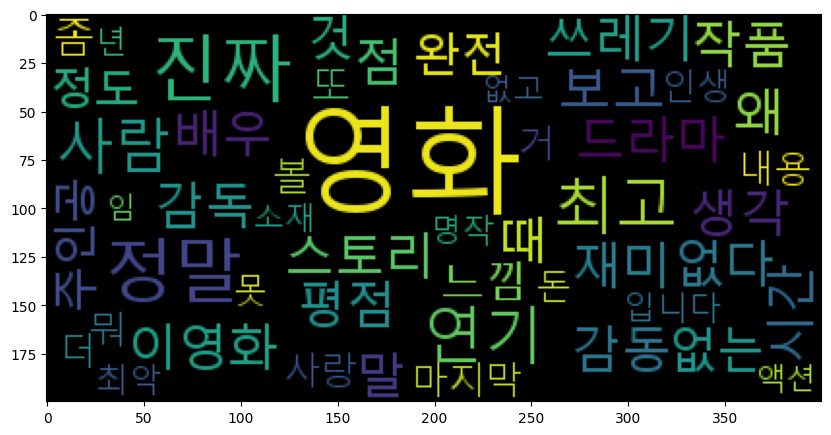

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def doc2tag(label, top=50):
    okt = Okt()
    temp_list = []
    dataList = []

    for sentence in label:
        s_list=okt.pos(sentence)
    # dataList.append(s_list)
        for word,tag in s_list:
            if tag in ['Noun','Adjective']:
                temp_list.append(word)
        counts=collections.Counter(temp_list)
        tag=counts.most_common(50)
    return tag

def word_cloud_generator(tag):
    font_path = "c:/windows/fonts/malgun.ttf"
    # custom_weights = {'배우': 30000, '감독': 1000, "영화": -1000}
    wc=WordCloud(font_path=font_path,background_color='black', max_font_size=60)
    cloud=wc.generate_from_frequencies(dict(tag))

    plt.figure(figsize=(10,8))
    plt.imshow(cloud)

    return cloud

doc2tag(positives['document'][:5])
word_cloud_generator(tag)

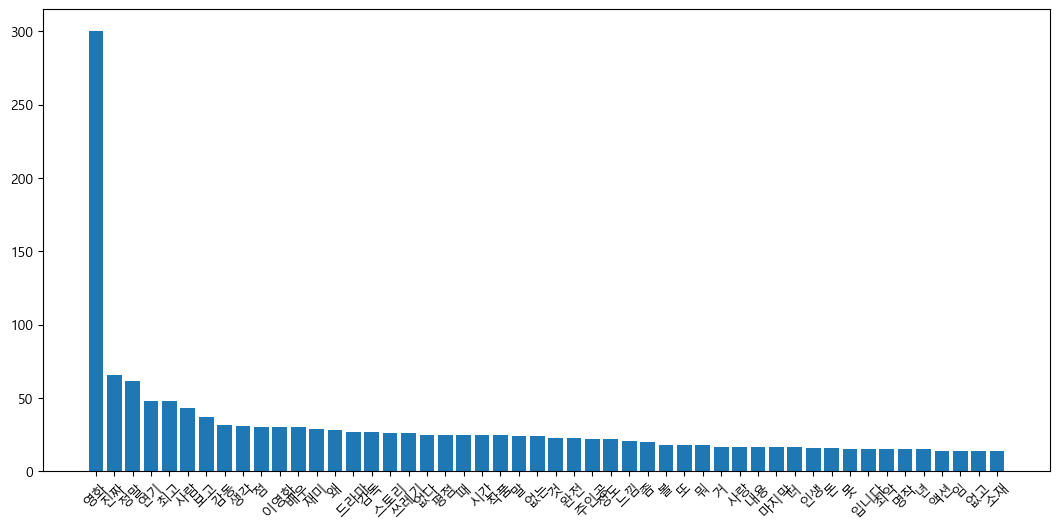

In [19]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (13,6))
plt.bar(dict(tag).keys(), dict(tag).values())
plt.xticks(rotation=45)
plt.show()